In [49]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [50]:
clustered_comments = pd.read_csv('../processed_data/clustered_comments.csv')

In [51]:
# Load sentiment intensity analyzers
sid_VADER = SentimentIntensityAnalyzer()

In [52]:
# Calculate sentiment scores
sentiments = []
for index, row in clustered_comments.iterrows():
    sentiment_VADER = sid_VADER.polarity_scores(row['comment'])
    blob = TextBlob(row['comment'])
    polarity_blob = blob.sentiment.polarity
    sentiments.append({
        'comment' : row['comment'],
        'cluster' : row['label'],
        'sentiment_VADER' : sentiment_VADER['compound'],
        'sentiment_textblob' : polarity_blob
    })
sentiments

[{'comment': 'weaponized justice system we will be the next banana republic if this were a democratic x president liberals and democrats would be furious but since its trump their saving democracy',
  'cluster': 0,
  'sentiment_VADER': -0.0387,
  'sentiment_textblob': 0.0},
 {'comment': 'i dont care about any of this crap getting thrown at trumpim voting for him again he has the balls to fix whats broken in the usaespecially the crap thats going on at the border and the freshly booted dhs secretary alejandro n mayorkas',
  'cluster': 0,
  'sentiment_VADER': -0.894,
  'sentiment_textblob': -0.425},
 {'comment': 'if trump doesnt have the now is the time for the rnc to tell him to eff off',
  'cluster': 0,
  'sentiment_VADER': 0.0,
  'sentiment_textblob': 0.0},
 {'comment': 'hey cnn 133 days have passed since 6 american hostages have been held in gaza by hamas and this is what you prioritize shameful',
  'cluster': 0,
  'sentiment_VADER': -0.4939,
  'sentiment_textblob': 0.0},
 {'comment'

In [53]:
# Create a dataframe from the sentiment scores
sentiments_df = pd.DataFrame(sentiments)

In [54]:
# Aggregate the sentiment scores by cluster
clustered_sentiments = sentiments_df.groupby('cluster').agg({
    'sentiment_VADER' : ['mean', 'std'],
    'sentiment_textblob' : ['mean', 'std']
})
clustered_sentiments

sentiment_VADER           sentiment_textblob          
                   mean       std               mean       std
cluster                                                       
0             -0.055349  0.519410           0.037929  0.312191
1             -0.096819  0.493013          -0.041423  0.293879
2             -0.231944  0.525288           0.030338  0.241757
3             -0.000916  0.436408           0.064164  0.267649
4              0.059136  0.428221           0.077236  0.322261

In [55]:
# Save the sentiment scores
clustered_sentiments.to_csv('../processed_data/clustered_sentiments.csv')

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

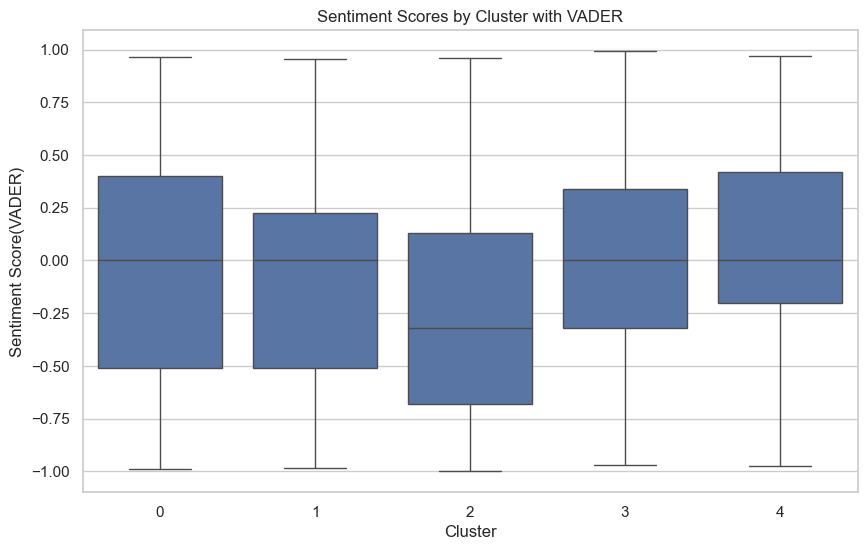

In [57]:
# Plot the sentiment scores with VADER
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Create a boxplot, add VADER sentiment to the axis label
ax = sns.boxplot(x='cluster', y='sentiment_VADER', data=sentiments_df)  
ax.set_title('Sentiment Scores by Cluster with VADER')
ax.set_xlabel('Cluster')
ax.set_ylabel('Sentiment Score(VADER)')
plt.savefig('../images/sentiment_scores_vader.png')
plt.show()

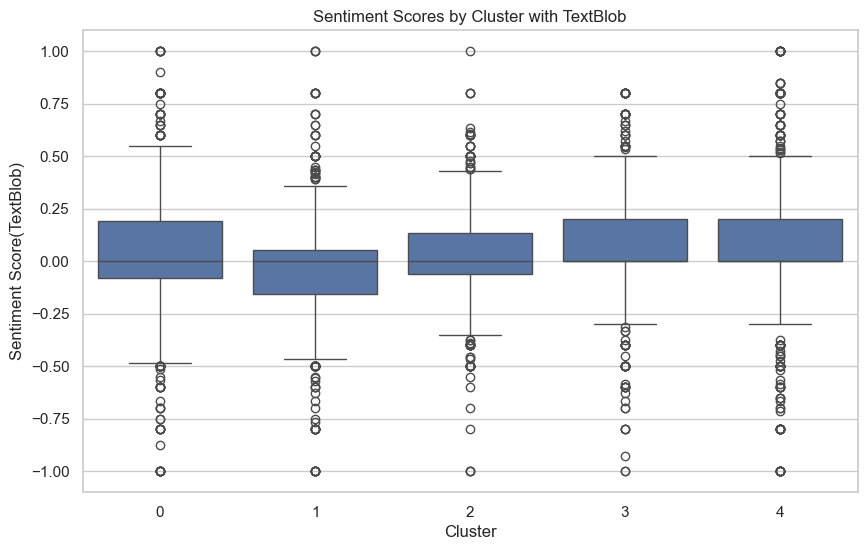

In [58]:
# Plot the sentiment scores with TextBlob
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
# Create a boxplot, add TextBlob sentiment to the axis label
ax = sns.boxplot(x='cluster', y='sentiment_textblob', data=sentiments_df)
ax.set_title('Sentiment Scores by Cluster with TextBlob')
ax.set_xlabel('Cluster')
ax.set_ylabel('Sentiment Score(TextBlob)')
plt.savefig('../images/sentiment_scores_textblob.png')
plt.show()